In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

### Data extraction, cleaning and assignment to variables ###
lst_of_var = ['EDAC_30_AMI Denominator', 'EDAC_30_AMI Score', 'EDAC_30_HF Denominator', 'EDAC_30_HF Score',
              'EDAC_30_PN Denominator', 'EDAC_30_PN Score', 'OP_32 Denominator', 'OP_32 Score',
              'OP_35_ADM Denominator', 'OP_35_ADM Score', 'OP_35_ED Denominator', 'OP_35_ED Score',
              'OP_36 Denominator', 'OP_36 Score', 'READM_30_AMI Denominator', 'READM_30_AMI Score',
              'READM_30_CABG Denominator', 'READM_30_CABG Score', 'READM_30_COPD Denominator',
              'READM_30_COPD Score', 'READM_30_HF Denominator', 'READM_30_HF Score',
              'READM_30_HIP_KNEE Denominator', 'READM_30_HIP_KNEE Score', 'READM_30_HOSP_WIDE Denominator',
              'READM_30_HOSP_WIDE Score', 'READM_30_PN Denominator', 'READM_30_PN Score']

df = pd.read_csv('data_for_predictive_analytics.csv').filter(['Compared to National', *lst_of_var])

# Drops and returns the column
df_target = df.pop('Compared to National')

# Assignment to variables
df_x = df
df_y = df_target

# Convertion to numpy array
X = np.array(df_x).astype(float)
y = np.array(df_y).reshape(-1).astype(float)

                         Variables Coefficients    Std Dev p-value
1          EDAC_30_AMI Denominator      -0.8392      0.166   0.000
2                EDAC_30_AMI Score       1.4065      0.102   0.000
3           EDAC_30_HF Denominator       0.1569      0.285   0.582
4                 EDAC_30_HF Score      -0.9383      0.122   0.000
5           EDAC_30_PN Denominator      56.8932     34.317   0.097
6                 EDAC_30_PN Score      -0.5216      0.097   0.000
7                OP_32 Denominator       0.1103      0.299   0.712
8                      OP_32 Score       0.3029      0.032   0.000
9            OP_35_ADM Denominator       0.5100      0.140   0.000
10                 OP_35_ADM Score       0.2570      0.172   0.136
11            OP_35_ED Denominator       0.5100      0.140   0.000
12                  OP_35_ED Score      -0.1325      0.194   0.494
13               OP_36 Denominator      -2.1071      0.296   0.000
14                     OP_36 Score       0.0403      0.063   0

/Users/nasimulalahi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


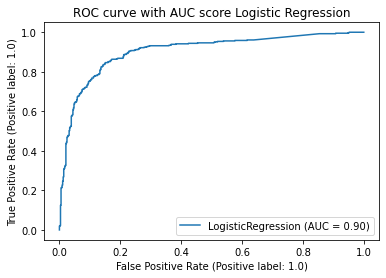

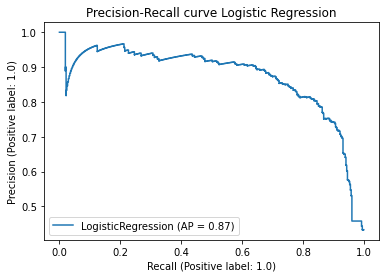

****************************** Naive Bayes Classifier ******************************

Accuracy score: 0.6858
           predicted: 0  predicted: 1
actual: 0           324           240
actual: 1            66           344
Precision Score with Macro Average: 0.7099051633298209
Precision Score with Micro Average: 0.6858316221765913
Precision Score with Weighted Average: 0.7290150877504258
Recall Score with Macro Average: 0.7067462376751428
Recall Score with Micro Average: 0.6858316221765913
Recall Score with Weighted Average: 0.6858316221765913




/Users/nasimulalahi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


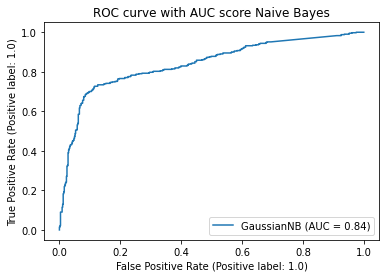

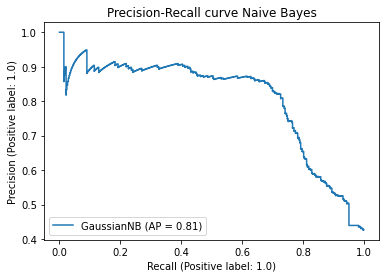

****************************** Decision Tree Classifier ******************************

Accuracy score: 0.8480
           predicted: 0  predicted: 1
actual: 0           506            58
actual: 1            90           320
Precision Score with Macro Average: 0.8477770675757252
Precision Score with Micro Average: 0.8480492813141683
Precision Score with Weighted Average: 0.8479693653542585
Recall Score with Macro Average: 0.8388254627227123
Recall Score with Micro Average: 0.8480492813141683
Recall Score with Weighted Average: 0.8480492813141683




/Users/nasimulalahi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


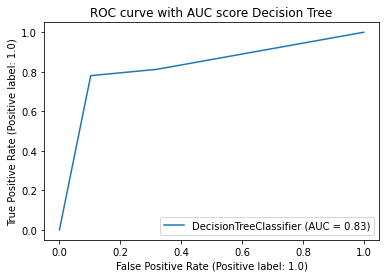

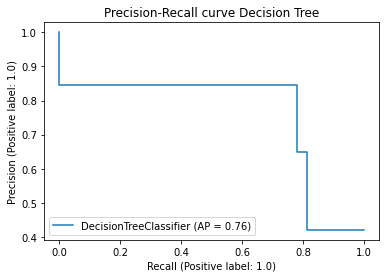

****************************** Random Forest Classifier ******************************

Accuracy score: 0.8850
           predicted: 0  predicted: 1
actual: 0           512            52
actual: 1            60           350
Precision Score with Macro Average: 0.8828758306370247
Precision Score with Micro Average: 0.8850102669404517
Precision Score with Weighted Average: 0.8848093788177763
Recall Score with Macro Average: 0.880729977512541
Recall Score with Micro Average: 0.8850102669404517
Recall Score with Weighted Average: 0.8850102669404517




/Users/nasimulalahi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


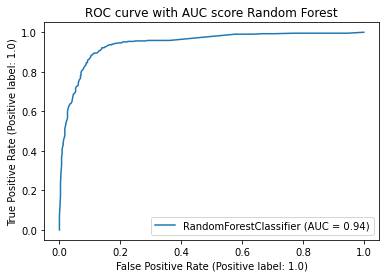

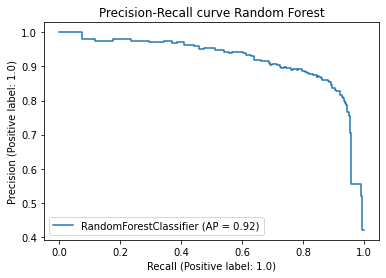

In [3]:
# scikit-learn logistic regression model
# since the traget values are severely unbalanced (high number of 0s),
# the weights associated with classes should be inversely proportional to class frequencies
# and balanced
model_logistic = LogisticRegression(max_iter=1000)

# scikit-learn naive bayes classifier
model_naive = GaussianNB()

# scikit-learn decision tree classifier
model_decision = DecisionTreeClassifier()

# scikit-learn random forest classifier
model_forest = RandomForestClassifier()

# Scaling and Standardization
scaler = preprocessing.MinMaxScaler()
x_scaler = scaler.fit_transform(X)

# Normalization
x = preprocessing.normalize(x_scaler, norm='l2', axis=1, copy=True, return_norm=False)

# Train-test split, shuffle is disabled
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

# Training the logistic regression model
model_logistic.fit(x_train, y_train)

# Training the naive bayes classifier
model_naive.fit(x_train, y_train)

# Training the decision tree classifier
model_decision.fit(x_train, y_train)

# Training the random forest classifier
model_forest.fit(x_train, y_train)

# Variables | Coefficients | Standard Deviation | p-value
sm_model = sm.OLS(y, x)
result = sm_model.fit()
result_df = pd.DataFrame(result.summary().tables[1])
result_df.columns = ['Variables', 'Coefficients', 'Std Dev', 'dr1', 'p-value', 'dr2', 'dr3']
result_df = result_df.drop(['dr1', 'dr2', 'dr3'], axis=1)
result_df = result_df.drop(index=0)

# Assigning variables to the feature names
result_df['Variables'] = df_x.columns 
print(result_df, '\n\n')

# Making predictions (logistic regression)
predictions_logistic = model_logistic.predict(x_test)

# Making predictions (naive bayes)
predictions_naive = model_naive.predict(x_test)

# Making predictions (decision tree)
predictions_decision = model_decision.predict(x_test)

# Making predictions (random forest)
predictions_forest = model_forest.predict(x_test)

# Accuracy score (logistic regression)
print('{} Logistic Regression Classifier {}'.format('*' * 30, '*' * 30))
print("\nAccuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions_logistic)))

# Confusion matrix (logistic regression)
conf_matrix_logistic = pd.DataFrame(metrics.confusion_matrix(y_test, predictions_logistic),
                           columns=['predicted: 0', 'predicted: 1'],
                           index=['actual: 0', 'actual: 1'])
print(conf_matrix_logistic)

# ROC curve with AUC score (logistic regression)
metrics.plot_roc_curve(model_logistic, x_test, y_test)
plt.title(label='ROC curve with AUC score Logistic Regression')

# Precision score (logistic regression)
print('Precision Score with Macro Average: {}'.format(precision_score(y_test, predictions_logistic, average='macro')))
print('Precision Score with Micro Average: {}'.format(precision_score(y_test, predictions_logistic, average='micro')))
print('Precision Score with Weighted Average: {}'.format(precision_score(y_test, predictions_logistic, average='weighted')))

# Recall score (logistic regression)
print('Recall Score with Macro Average: {}'.format(recall_score(y_test, predictions_logistic, average='macro')))
print('Recall Score with Micro Average: {}'.format(recall_score(y_test, predictions_logistic, average='micro')))
print('Recall Score with Weighted Average: {}'.format(recall_score(y_test, predictions_logistic, average='weighted')))
print('\n')

# Precision-recall score and curve (logistic regression)
display_logistic = PrecisionRecallDisplay.from_estimator(model_logistic, x_test, y_test)
_ = display_logistic.ax_.set_title("Precision-Recall curve Logistic Regression")

plt.show()

# Accuracy score (naive bayes)
print('{} Naive Bayes Classifier {}'.format('*' * 30, '*' * 30))
print("\nAccuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions_naive)))

# Confusion matrix (naive bayes)
conf_matrix_naive = pd.DataFrame(metrics.confusion_matrix(y_test, predictions_naive),
                           columns=['predicted: 0', 'predicted: 1'],
                           index=['actual: 0', 'actual: 1'])
print(conf_matrix_naive)

# ROC curve with AUC score (naive bayes)
metrics.plot_roc_curve(model_naive, x_test, y_test)
plt.title(label='ROC curve with AUC score Naive Bayes')

# Precision score (naive bayes)
print('Precision Score with Macro Average: {}'.format(precision_score(y_test, predictions_naive, average='macro')))
print('Precision Score with Micro Average: {}'.format(precision_score(y_test, predictions_naive, average='micro')))
print('Precision Score with Weighted Average: {}'.format(precision_score(y_test, predictions_naive, average='weighted')))

# Recall score (naive bayes)
print('Recall Score with Macro Average: {}'.format(recall_score(y_test, predictions_naive, average='macro')))
print('Recall Score with Micro Average: {}'.format(recall_score(y_test, predictions_naive, average='micro')))
print('Recall Score with Weighted Average: {}'.format(recall_score(y_test, predictions_naive, average='weighted')))
print('\n')

# Precision-recall score and curve (naive bayes)
display_naive = PrecisionRecallDisplay.from_estimator(model_naive, x_test, y_test)
_ = display_naive.ax_.set_title("Precision-Recall curve Naive Bayes")

plt.show()

# Accuracy score (decision tree)
print('{} Decision Tree Classifier {}'.format('*' * 30, '*' * 30))
print("\nAccuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions_decision)))

# Confusion matrix (decision tree)
conf_matrix_decision = pd.DataFrame(metrics.confusion_matrix(y_test, predictions_decision),
                           columns=['predicted: 0', 'predicted: 1'],
                           index=['actual: 0', 'actual: 1'])
print(conf_matrix_decision)

# ROC curve with AUC score (decision tree)
metrics.plot_roc_curve(model_decision, x_test, y_test)
plt.title(label='ROC curve with AUC score Decision Tree')

# Precision score (decision tree)
print('Precision Score with Macro Average: {}'.format(precision_score(y_test, predictions_decision, average='macro')))
print('Precision Score with Micro Average: {}'.format(precision_score(y_test, predictions_decision, average='micro')))
print('Precision Score with Weighted Average: {}'.format(precision_score(y_test, predictions_decision, average='weighted')))

# Recall score (decision tree)
print('Recall Score with Macro Average: {}'.format(recall_score(y_test, predictions_decision, average='macro')))
print('Recall Score with Micro Average: {}'.format(recall_score(y_test, predictions_decision, average='micro')))
print('Recall Score with Weighted Average: {}'.format(recall_score(y_test, predictions_decision, average='weighted')))
print('\n')

# Precision-recall score and curve (decision tree)
display_decision = PrecisionRecallDisplay.from_estimator(model_decision, x_test, y_test)
_ = display_decision.ax_.set_title("Precision-Recall curve Decision Tree")

plt.show()

# Accuracy score (random forest)
print('{} Random Forest Classifier {}'.format('*' * 30, '*' * 30))
print("\nAccuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions_forest)))

# Confusion matrix (random forest)
conf_matrix_forest= pd.DataFrame(metrics.confusion_matrix(y_test, predictions_forest),
                           columns=['predicted: 0', 'predicted: 1'],
                           index=['actual: 0', 'actual: 1'])
print(conf_matrix_forest)

# ROC curve with AUC score (random forest)
metrics.plot_roc_curve(model_forest, x_test, y_test)
plt.title(label='ROC curve with AUC score Random Forest')

# Precision score (random forest)
print('Precision Score with Macro Average: {}'.format(precision_score(y_test, predictions_forest, average='macro')))
print('Precision Score with Micro Average: {}'.format(precision_score(y_test, predictions_forest, average='micro')))
print('Precision Score with Weighted Average: {}'.format(precision_score(y_test, predictions_forest, average='weighted')))

# Recall score (random forest)
print('Recall Score with Macro Average: {}'.format(recall_score(y_test, predictions_forest, average='macro')))
print('Recall Score with Micro Average: {}'.format(recall_score(y_test, predictions_forest, average='micro')))
print('Recall Score with Weighted Average: {}'.format(recall_score(y_test, predictions_forest, average='weighted')))
print('\n')

# Precision-recall score and curve (random forest)
display_forest = PrecisionRecallDisplay.from_estimator(model_forest, x_test, y_test)
_ = display_forest.ax_.set_title("Precision-Recall curve Random Forest")

plt.show()